**Application of Data Mining in Yelp Dataset**

Team Members:
1.   Yinghao Lin
2.   Jihye Park
3.   Sai Pothuraju
4.   Nishant Shakya
5.   Chaoqun Yu


In [0]:
# mount the shared drive which contains the data files

from google.colab import drive
drive.mount('/content/drive')
currentFilePath = '/content/drive/Shared drives/CSC579 CSC493 - Data Mining and Knowledge Discovery/Dataset/'

In [0]:
# EDA
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import DBSCAN

# Miscellaneous
import json
from pandas.io.json import json_normalize
import time

# Exploratory Data Analysis (EDA)

Functions to import JSON into pandas dataframe. pandas read_json was throwing out of memory exception. Reading and loading using python File I/O helped here.

In [0]:
# function to read a large JSON file in smaller chunks
def getDataFrameByChunks(file):
  jsonReader = pd.read_json(currentFilePath + file, lines=True, chunksize=1000)
  for chunk in jsonReader:
    print(chunk)

# function to read a JSON file
def getDataFrame(file):
  return pd.read_json(currentFilePath + file, lines=True)

# function to read the JSON file without using pandas readJSON (works for large JSON files)
def getDataFramePython(file):
  with open(currentFilePath + file, 'r') as f:
    data = f.readlines()
    data = list(map(json.loads, data)) 
  return pd.DataFrame(data)
  

In [0]:
business_df = getDataFrame('business.json');

In [0]:
business_type, state_code, city = 'Restaurant', 'NV', 'Las Vegas'

Only filter restaurants

In [0]:
restaurants_with_categeories = business_df[business_df.categories.notnull()]
restaurants_df = restaurants_with_categeories[restaurants_with_categeories.categories.str.contains(business_type)]

In [0]:
restaurants_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None


Top 5 states with highest number of restaurants

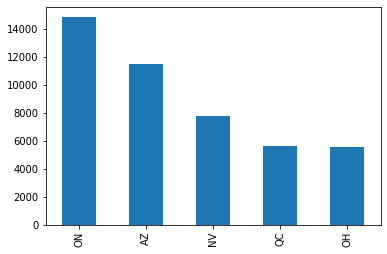

In [0]:
restaurants_df.state.value_counts()[:5].plot.bar()

In [0]:
restaurants_NV = restaurants_df[restaurants_df.state == state_code]
restaurants_NV.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'..."
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,6125 Spring Mountain Rd,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...","Fast Food, Food, Restaurants, Ice Cream & Froz...",None
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,4343 N Rancho Dr,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,None,"Restaurants, Chinese",None
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Artisan Hotel, 1501 W Sahara Ave",Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"{'RestaurantsAttire': ''dressy'', 'Corkage': '...","Restaurants, Pizza, Italian, American (New)","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."


Check for cities in Nevada with high number of businesses.

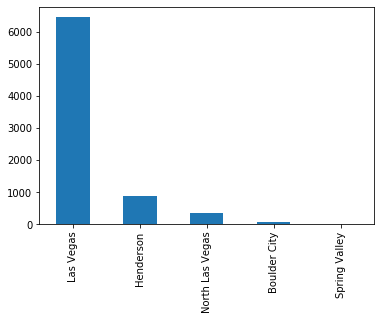

In [0]:
restaurants_NV.city.value_counts()[:5].plot.bar()

In [0]:
restaurants_LasVegas = restaurants_NV[restaurants_NV.city == city]
restaurants_LasVegas.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'..."
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,6125 Spring Mountain Rd,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...","Fast Food, Food, Restaurants, Ice Cream & Froz...",None
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,4343 N Rancho Dr,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,None,"Restaurants, Chinese",None
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Artisan Hotel, 1501 W Sahara Ave",Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"{'RestaurantsAttire': ''dressy'', 'Corkage': '...","Restaurants, Pizza, Italian, American (New)","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."


Only filter **restaurants** in categories column in business.json.





# Data Cleaning

In [0]:
restaurants_LasVegas.attributes.isna().value_counts()

False    6298
True      156
Name: attributes, dtype: int64

Converting attributes column with null values into empty JSON

In [0]:
restaurants_LasVegas.attributes = restaurants_LasVegas.attributes.apply(lambda x: {} if x is None else x)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
restaurants_LasVegas.attributes.isna().value_counts()

False    6454
Name: attributes, dtype: int64

Flatten the inner JSON in **attributes** column.

In [0]:
restaurants_LasVegas_attributes = json_normalize(restaurants_LasVegas.attributes)

In [0]:
restaurants_LasVegas_attributes.index = restaurants_LasVegas.index

In [0]:
restaurants_LasVegas = pd.concat([restaurants_LasVegas,restaurants_LasVegas_attributes ], axis = 1)

In [0]:
restaurants_LasVegas = restaurants_LasVegas.drop(['attributes'], axis = 1)

In [0]:
restaurants_LasVegas.shape

(6454, 51)

In [0]:
restaurants_LasVegas.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,RestaurantsAttire,Ambience,HasTV,BYOBCorkage,NoiseLevel,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,Caters,GoodForKids,Alcohol,BusinessParking,BikeParking,HappyHour,GoodForMeal,Corkage,BYOB,RestaurantsTableService,WheelchairAccessible,ByAppointmentOnly,BusinessAcceptsBitcoin,GoodForDancing,Music,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"Restaurants, Italian",None,False,True,False,True,'casual',"{'romantic': True, 'intimate': False, 'tourist...",False,'no',u'quiet',True,2,True,u'no',True,True,u'full_bar',"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",True,NaN,'average',True,1,True,u'no',False,True,u'beer_and_wine',"{'garage': False, 'street': False, 'validated'...",True,False,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,6125 Spring Mountain Rd,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"Fast Food, Food, Restaurants, Ice Cream & Froz...",None,False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,u'average',True,1,True,'no',False,True,u'none',"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,4343 N Rancho Dr,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,"Restaurants, Chinese",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Artisan Hotel, 1501 W Sahara Ave",Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"Restaurants, Pizza, Italian, American (New)","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",False,True,False,True,'dressy',NaN,True,'yes_corkage',u'quiet',False,4,True,u'no',False,False,u'full_bar',"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**TODO**



*   Find the best way to fill NaN
*   Convert u'' unicode to string



In [0]:
restaurants_LasVegas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6454 entries, 17 to 192562
Data columns (total 51 columns):
business_id                   6454 non-null object
name                          6454 non-null object
address                       6454 non-null object
city                          6454 non-null object
state                         6454 non-null object
postal_code                   6454 non-null object
latitude                      6454 non-null float64
longitude                     6454 non-null float64
stars                         6454 non-null float64
review_count                  6454 non-null int64
is_open                       6454 non-null int64
categories                    6454 non-null object
hours                         5008 non-null object
OutdoorSeating                5655 non-null object
BusinessAcceptsCreditCards    6137 non-null object
RestaurantsDelivery           5702 non-null object
RestaurantsReservations       5748 non-null object
RestaurantsAttire     

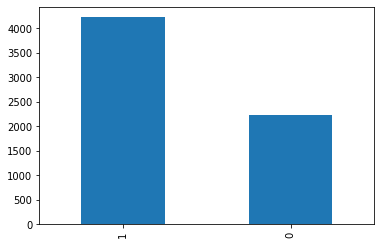

In [0]:
restaurants_LasVegas['is_open'].value_counts().plot.bar()

In [0]:
restaurants_LasVegas.is_open.isnull().sum()

0

In [0]:
restaurants_LasVegas.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'hours', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'RestaurantsDelivery', 'RestaurantsReservations', 'RestaurantsAttire',
       'Ambience', 'HasTV', 'BYOBCorkage', 'NoiseLevel', 'RestaurantsTakeOut',
       'RestaurantsPriceRange2', 'RestaurantsGoodForGroups', 'WiFi', 'Caters',
       'GoodForKids', 'Alcohol', 'BusinessParking', 'BikeParking', 'HappyHour',
       'GoodForMeal', 'Corkage', 'BYOB', 'RestaurantsTableService',
       'WheelchairAccessible', 'ByAppointmentOnly', 'BusinessAcceptsBitcoin',
       'GoodForDancing', 'Music', 'BestNights', 'DogsAllowed', 'DriveThru',
       'Smoking', 'CoatCheck', 'AgesAllowed', 'DietaryRestrictions',
       'AcceptsInsurance', 'Open24Hours', 'RestaurantsCounterService'],
      dtype='object')

In [0]:
restaurants_LasVegas = restaurants_LasVegas.drop(['address', 'hours'], axis = 1)

In [0]:
restaurants_LasVegas.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,RestaurantsAttire,Ambience,HasTV,BYOBCorkage,NoiseLevel,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,Caters,GoodForKids,Alcohol,BusinessParking,BikeParking,HappyHour,GoodForMeal,Corkage,BYOB,RestaurantsTableService,WheelchairAccessible,ByAppointmentOnly,BusinessAcceptsBitcoin,GoodForDancing,Music,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"Restaurants, Italian",False,True,False,True,'casual',"{'romantic': True, 'intimate': False, 'tourist...",False,'no',u'quiet',True,2,True,u'no',True,True,u'full_bar',"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",True,NaN,'average',True,1,True,u'no',False,True,u'beer_and_wine',"{'garage': False, 'street': False, 'validated'...",True,False,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"Fast Food, Food, Restaurants, Ice Cream & Froz...",False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,u'average',True,1,True,'no',False,True,u'none',"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,"Restaurants, Chinese",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"Restaurants, Pizza, Italian, American (New)",False,True,False,True,'dressy',NaN,True,'yes_corkage',u'quiet',False,4,True,u'no',False,False,u'full_bar',"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


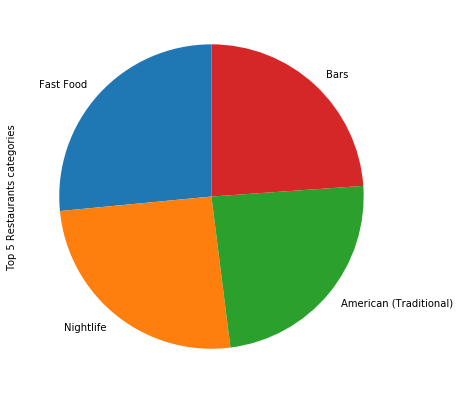

In [0]:
pd.Series(restaurants_LasVegas.categories.str.cat(sep=', ').split(', '), name='Top 5 Restaurants categories').value_counts()[2:6].plot.pie(figsize=(7,7), startangle=90)

# Data Integration and Feature Engineering

Some missing values in categories data

Check the business categories in Las Vegas

In [0]:
review_df = getDataFramePython('review.json')

In [0]:
review_df.shape

(6685900, 9)

In [0]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


List the resturant ids (business_id) for restaurants in Las Vegas

Aggregate cool, funny, stars, useful values by business_id

In [0]:
review_df = review_df[review_df.business_id.isin(restaurants_LasVegas.business_id)]

In [0]:
review_bk = review_df.copy()

In [0]:
review_bk.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10,kbtscdyz6lvrtGjD1quQTg,FIk4lQQu1eTe2EpzQ4xhBA,8mIrX_LrOnAqWsB5JrOojQ,4.0,0,0,0,"Like walking back in time, every Saturday morn...",2011-11-30 02:11:15
22,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0,0,0,The food is always good and the prices are rea...,2016-01-17 05:26:22
23,S337tATeouQJdoPYyir29w,2mxBNBeFrgDszqGS5tdEHA,d_L-rfS1vT3JMzgCUGtiow,5.0,0,0,0,Pick any meat on the planet and the chef will ...,2016-07-25 03:57:19
24,D_UvaenM25iNd6aehTZ0MA,8NwU4TRsD3S6gIfBqFzDMQ,Sfc8Haz2Yri8Mo1L0E0TsA,5.0,0,0,0,"Great food, great service. Obviously fried chi...",2012-11-06 03:41:43
27,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,0,0,1,their pettuccine was fresh-made in the morning...,2013-12-28 22:28:08


In [0]:
review_df['points'] = review_df['cool'] + review_df['funny'] + review_df['useful']

In [0]:
review_df.shape
review_org_df = review_df.copy()

In [0]:
review_df = review_df.groupby(by='business_id')

In [0]:
dates = review_df.date.agg(['max', 'min', 'count'])
amax = pd.to_datetime(dates['max'])
amin =  pd.to_datetime(dates['min'])
review = pd.DataFrame()
# review['delta'] = (max(amax) - amin).dt.days
review['OldestReviewDate'] = amin
review['LatestReviewDate'] = amax
# review['ReviewsPerWeek'] = dates['count']/(review['delta']/7)
# review['TotalStars'] = review_df['stars'].sum()
# review['TotalReviews'] = review_df['stars'].count()
# review['AverageStars'] = review_df['stars'].mean()
# review['TotalPoints'] = review_df['points'].sum()
review['points'] = review_df['points'].mean()
# review['TotalCool'] = review_df['cool'].sum()
# review['AverageCool'] = review_df['cool'].mean()
# review['TotalFunny'] = review_df['funny'].sum()
# review['AverageFunny'] = review_df['funny'].mean()
# review['TotalUseful'] = review_df['useful'].sum()
# review['AverageUseful'] = review_df['useful'].mean()

In [0]:
review.head()

,OldestReviewDate,LatestReviewDate,points
business_id,,,
--9e1ONYQuAa-CB_Rrw7Tw,2005-04-27 23:38:49,2018-11-09 16:15:53,2.329922
--q7kSBRb0vWC8lSkXFByA,2008-04-17 17:34:39,2012-06-07 23:12:00,1.000000
-0BxAGlIk5DJAGVkpqBXxg,2007-02-09 18:11:13,2018-07-20 15:58:55,1.545455
-0RkJ_uIduNLWQrphbADRw,2018-08-30 16:47:45,2018-11-11 20:55:03,4.158730
-153AjTW5luZPK4omEujWA,2009-06-02 00:02:25,2010-06-14 03:45:26,1.200000


In [0]:
review.shape

(6454, 3)

In [0]:
# Check if the businesses in Las Vegas have reviews on reviews.json
mergeData = pd.merge(left=restaurants_LasVegas, right = review, on='business_id', how='left');

In [0]:
mergeData.shape

(6454, 52)

In [0]:
mergeData.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,RestaurantsAttire,Ambience,HasTV,BYOBCorkage,NoiseLevel,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,Caters,GoodForKids,Alcohol,BusinessParking,BikeParking,HappyHour,GoodForMeal,Corkage,BYOB,RestaurantsTableService,WheelchairAccessible,ByAppointmentOnly,BusinessAcceptsBitcoin,GoodForDancing,Music,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService,OldestReviewDate,LatestReviewDate,points
0,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"Restaurants, Italian",False,True,False,True,'casual',"{'romantic': True, 'intimate': False, 'tourist...",False,'no',u'quiet',True,2,True,u'no',True,True,u'full_bar',"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-08-23 06:01:28,2016-08-09 19:02:44,2.146341
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",True,NaN,'average',True,1,True,u'no',False,True,u'beer_and_wine',"{'garage': False, 'street': False, 'validated'...",True,False,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-03-23 02:46:58,2018-11-14 03:44:07,1.656085
2,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"Fast Food, Food, Restaurants, Ice Cream & Froz...",False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,u'average',True,1,True,'no',False,True,u'none',"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-02 17:31:32,2017-01-05 05:28:32,2.363636
3,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,"Restaurants, Chinese",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-16 22:49:01,2009-02-10 20:20:11,1.250000
4,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"Restaurants, Pizza, Italian, American (New)",False,True,False,True,'dressy',NaN,True,'yes_corkage',u'quiet',False,4,True,u'no',False,False,u'full_bar',"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-26 22:31:08,2015-04-27 23:48:17,1.333333


In [0]:
mergeData.isnull().sum()

business_id                      0
name                             0
city                             0
state                            0
postal_code                      0
latitude                         0
longitude                        0
stars                            0
review_count                     0
is_open                          0
categories                       0
OutdoorSeating                 799
BusinessAcceptsCreditCards     317
RestaurantsDelivery            752
RestaurantsReservations        706
RestaurantsAttire              833
Ambience                      1202
HasTV                         1168
BYOBCorkage                   6123
NoiseLevel                    1682
RestaurantsTakeOut             571
RestaurantsPriceRange2         483
RestaurantsGoodForGroups       641
WiFi                          1451
Caters                        1913
GoodForKids                    654
Alcohol                       1150
BusinessParking                841
BikeParking         

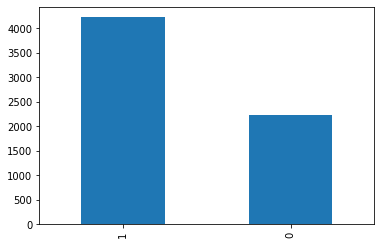

In [0]:
mergeData['is_open'].value_counts().plot.bar()

In [0]:
mergeData.is_open.isna().value_counts()

False    6454
Name: is_open, dtype: int64

In [0]:
mergeData.shape

(6454, 52)

In [0]:
checkin_df = getDataFrame('checkin.json')

In [0]:
checkin_df.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [0]:
checkin_df['TotalCheckins'] = checkin_df['date'].str.split(',').str.len()

In [0]:
checkin_df = checkin_df[checkin_df.business_id.isin(restaurants_LasVegas.business_id)]

In [0]:
checkin_df = checkin_df.drop(['date'], axis = 1)

Merge Checkin reviews and business data

In [0]:
mergeData = pd.merge(left=mergeData, right = checkin_df, on='business_id', how='left');

In [0]:
mergeData.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,RestaurantsAttire,Ambience,HasTV,BYOBCorkage,NoiseLevel,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,Caters,GoodForKids,Alcohol,BusinessParking,BikeParking,HappyHour,GoodForMeal,Corkage,BYOB,RestaurantsTableService,WheelchairAccessible,ByAppointmentOnly,BusinessAcceptsBitcoin,GoodForDancing,Music,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService,OldestReviewDate,LatestReviewDate,points,TotalCheckins
0,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"Restaurants, Italian",False,True,False,True,'casual',"{'romantic': True, 'intimate': False, 'tourist...",False,'no',u'quiet',True,2,True,u'no',True,True,u'full_bar',"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-08-23 06:01:28,2016-08-09 19:02:44,2.146341,17.0
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",True,NaN,'average',True,1,True,u'no',False,True,u'beer_and_wine',"{'garage': False, 'street': False, 'validated'...",True,False,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-03-23 02:46:58,2018-11-14 03:44:07,1.656085,458.0
2,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"Fast Food, Food, Restaurants, Ice Cream & Froz...",False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,u'average',True,1,True,'no',False,True,u'none',"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-02 17:31:32,2017-01-05 05:28:32,2.363636,203.0
3,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,"Restaurants, Chinese",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-16 22:49:01,2009-02-10 20:20:11,1.250000,15.0
4,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"Restaurants, Pizza, Italian, American (New)",False,True,False,True,'dressy',NaN,True,'yes_corkage',u'quiet',False,4,True,u'no',False,False,u'full_bar',"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-26 22:31:08,2015-04-27 23:48:17,1.333333,3.0


In [0]:
mergeData.TotalCheckins.isna().sum()

166

In [0]:
mergeData.TotalCheckins.fillna(0,inplace=True)

In [0]:
mergeData.TotalCheckins.isna().sum()

0

In [0]:
part_of_chain_restaurants = mergeData.groupby('name').business_id.agg(['count'])> 1

In [0]:
part_of_chain_restaurants.head()

,count
name,
#1 Hawaiian Barbecue,True
100% Natural Mexican Grill,False
100℃,False
17 South Booze & Bites,False
188 Restaurant,False


In [0]:
part_of_chain_restaurants = part_of_chain_restaurants[part_of_chain_restaurants['count'] == True]

In [0]:
mergeData['PartOfChain'] = mergeData.name.isin(part_of_chain_restaurants.index) 

Rounding off float average values

In [0]:
mergeData.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,RestaurantsAttire,Ambience,HasTV,BYOBCorkage,NoiseLevel,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,Caters,GoodForKids,Alcohol,BusinessParking,BikeParking,HappyHour,GoodForMeal,Corkage,BYOB,RestaurantsTableService,WheelchairAccessible,ByAppointmentOnly,BusinessAcceptsBitcoin,GoodForDancing,Music,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService,OldestReviewDate,LatestReviewDate,points,TotalCheckins,PartOfChain
0,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"Restaurants, Italian",False,True,False,True,'casual',"{'romantic': True, 'intimate': False, 'tourist...",False,'no',u'quiet',True,2,True,u'no',True,True,u'full_bar',"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-08-23 06:01:28,2016-08-09 19:02:44,2.146341,17.0,False
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",True,NaN,'average',True,1,True,u'no',False,True,u'beer_and_wine',"{'garage': False, 'street': False, 'validated'...",True,False,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-03-23 02:46:58,2018-11-14 03:44:07,1.656085,458.0,False
2,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"Fast Food, Food, Restaurants, Ice Cream & Froz...",False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,u'average',True,1,True,'no',False,True,u'none',"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-02 17:31:32,2017-01-05 05:28:32,2.363636,203.0,True
3,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,"Restaurants, Chinese",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-16 22:49:01,2009-02-10 20:20:11,1.250000,15.0,False
4,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"Restaurants, Pizza, Italian, American (New)",False,True,False,True,'dressy',NaN,True,'yes_corkage',u'quiet',False,4,True,u'no',False,False,u'full_bar',"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-26 22:31:08,2015-04-27 23:48:17,1.333333,3.0,False


In [0]:
mergeData['AcceptsInsurance'].fillna(False, inplace=True)
mergeData['Open24Hours'].fillna(False, inplace=True)
mergeData['CoatCheck'].fillna(False, inplace=True)
mergeData['DriveThru'].fillna(False, inplace=True)
mergeData['DogsAllowed'].fillna(False, inplace=True)
mergeData['GoodForDancing'].fillna(False, inplace=True)
mergeData['BusinessAcceptsBitcoin'].fillna(False, inplace=True)
mergeData['ByAppointmentOnly'].fillna(False, inplace=True)
mergeData['WheelchairAccessible'].fillna(False, inplace=True)
mergeData['RestaurantsTableService'].fillna(False, inplace=True)
mergeData['BYOB'].fillna(False, inplace=True)
mergeData['Corkage'].fillna(False, inplace=True)
mergeData['HappyHour'].fillna(False, inplace=True)
mergeData['BikeParking'].fillna(False, inplace=True)
mergeData['GoodForKids'].fillna(False, inplace=True)
mergeData['Caters'].fillna(False, inplace=True)
mergeData['RestaurantsGoodForGroups'].fillna(False, inplace=True)
mergeData['RestaurantsPriceRange2'].fillna(0, inplace=True)
mergeData['RestaurantsTakeOut'].fillna(False, inplace=True)
mergeData['RestaurantsReservations'].fillna(False, inplace=True)
mergeData['RestaurantsDelivery'].fillna(False, inplace=True)
mergeData['BusinessAcceptsCreditCards'].fillna(False, inplace=True)
mergeData['OutdoorSeating'].fillna(False, inplace=True)
mergeData['HasTV'].fillna(False, inplace=True)
mergeData['RestaurantsCounterService'].fillna(False, inplace=True)

In [0]:
mergeData = mergeData.drop(['state', 'postal_code', 'business_id','categories', 'city', 'name', 'DietaryRestrictions', 'AgesAllowed', 'Smoking','BestNights','Music','GoodForMeal','BusinessParking','Alcohol','WiFi','NoiseLevel','BYOBCorkage','Ambience','RestaurantsAttire'],axis=1)
# mergeData = mergeData.drop(['state', 'postal_code', 'categories', 'city', 'name', 'DietaryRestrictions', 'AgesAllowed', 'Smoking','BestNights','Music','GoodForMeal','BusinessParking','Alcohol','WiFi','NoiseLevel','BYOBCorkage','Ambience','RestaurantsAttire'],axis=1)

In [0]:
replace_with = {'True': True, 'False': False, 'None':False}
mergeData = mergeData.replace(replace_with)
mergeData.RestaurantsPriceRange2 = pd.to_numeric(mergeData.RestaurantsPriceRange2)

In [0]:
mergeData.dtypes

latitude                             float64
longitude                            float64
stars                                float64
review_count                           int64
is_open                                int64
OutdoorSeating                          bool
BusinessAcceptsCreditCards              bool
RestaurantsDelivery                     bool
RestaurantsReservations                 bool
HasTV                                   bool
RestaurantsTakeOut                      bool
RestaurantsPriceRange2                 int64
RestaurantsGoodForGroups                bool
Caters                                  bool
GoodForKids                             bool
BikeParking                             bool
HappyHour                               bool
Corkage                                 bool
BYOB                                    bool
RestaurantsTableService                 bool
WheelchairAccessible                    bool
ByAppointmentOnly                       bool
BusinessAc

# Data Normalization

In [0]:
max_open_date = open_restaurants.LatestReviewDate.max()

def normalizePerWeek(x):
  max_date = None
  if (x.is_open == 1):
    max_date = max_open_date
  else:
    max_date = x.LatestReviewDate
  open_weeks = (max_date - x.OldestReviewDate).days/7
  return x.review_count/open_weeks if open_weeks else x.review_count 

In [0]:
mergeData['ReviewsPerWeek'] = mergeData.apply(normalizePerWeek, axis=1)

In [0]:
mergeData.head()

,latitude,longitude,stars,review_count,is_open,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,Caters,GoodForKids,BikeParking,HappyHour,Corkage,BYOB,RestaurantsTableService,WheelchairAccessible,ByAppointmentOnly,BusinessAcceptsBitcoin,GoodForDancing,DogsAllowed,DriveThru,CoatCheck,AcceptsInsurance,Open24Hours,RestaurantsCounterService,OldestReviewDate,LatestReviewDate,points,TotalCheckins,PartOfChain,ReviewsPerWeek
0,36.100016,-115.128529,4.0,40,0,False,True,False,True,False,True,2,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2007-08-23 06:01:28,2016-08-09 19:02:44,2.146341,17.0,False,0.085522
1,36.195615,-115.040529,4.5,184,1,False,True,False,False,True,True,1,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010-03-23 02:46:58,2018-11-14 03:44:07,1.656085,458.0,False,0.407853
2,36.125031,-115.225620,2.0,33,0,False,True,False,False,False,True,1,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2008-11-02 17:31:32,2017-01-05 05:28:32,2.363636,203.0,True,0.077387
3,36.238596,-115.233331,2.0,4,1,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2008-01-16 22:49:01,2009-02-10 20:20:11,1.250000,15.0,False,0.007081
4,36.143672,-115.169792,2.0,3,0,False,True,False,True,True,False,4,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2009-04-26 22:31:08,2015-04-27 23:48:17,1.333333,3.0,False,0.009580


In [0]:
mergeData.drop(['OldestReviewDate','LatestReviewDate'],axis=1,inplace=True)

# Clustering

In [0]:
mergeData_bk = mergeData.copy()

In [0]:
mergeData_bk = (mergeData_bk-mergeData_bk.mean())/mergeData_bk.std()

In [0]:
coords =  pd.DataFrame(mergeData, columns = ["latitude", "longitude"])

In [0]:
epsilon = 5/3956
min_sample = 1
db = DBSCAN(eps=epsilon, min_samples = min_sample).fit(coords)
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
num_clusters
# db = DBSCAN(eps=epsilon, min_samples = min_sample, metric='euclidean').fit(np.radians(coords) )
# cluster_labels = db.labels_

In [0]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(coords)

# clusters = db.fit_predict(X_scaled)

In [0]:
coords_bk = coords.copy()

In [0]:
coords_bk['cluster'] = cluster_labels.tolist()

In [0]:
coords_bk.cluster.value_counts()

In [0]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
coords.plot.scatter(
  x='latitude',
  y='longitude',
  c = cluster_labels,
  cmap = cmap,
  colorbar = True,
  figsize=(15,10)
)

In [0]:
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
mergeData['cluster'] = db.labels_.tolist()

In [0]:
mergeData.head()

,business_id,latitude,longitude,stars,review_count,is_open,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,Caters,GoodForKids,BikeParking,HappyHour,Corkage,BYOB,RestaurantsTableService,WheelchairAccessible,ByAppointmentOnly,BusinessAcceptsBitcoin,GoodForDancing,DogsAllowed,DriveThru,CoatCheck,AcceptsInsurance,Open24Hours,RestaurantsCounterService,delta,ReviewsPerWeek,TotalStars,TotalPoints,AveragePoints,TotalCool,AverageCool,TotalFunny,AverageFunny,TotalUseful,AverageUseful,TotalCheckins,PartOfChain,cool,funny,useful,cluster
0,PZ-LZzSlhSe9utkQYU8pFg,36.100016,-115.128529,4.0,40,0,False,True,False,True,False,True,2,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4101,0.069983,168.0,88,2.146341,14,0.341463,15,0.365854,59,1.439024,17.0,False,0.0,0.0,1.0,0
1,tstimHoMcYbkSC4eBA1wEg,36.195615,-115.040529,4.5,184,1,False,True,False,False,True,True,1,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3158,0.418936,813.0,313,1.656085,92,0.486772,53,0.280423,168,0.888889,458.0,False,0.0,0.0,1.0,1
2,kANF0dbeoW34s2vwh6Umfw,36.125031,-115.225620,2.0,33,0,False,True,False,False,False,True,1,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3664,0.063046,74.0,78,2.363636,21,0.636364,20,0.606061,37,1.121212,203.0,True,1.0,1.0,1.0,2
3,X8mtoSxY8whtmbDlj0D3Aw,36.238596,-115.233331,2.0,4,1,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3954,0.007081,7.0,5,1.250000,1,0.250000,2,0.500000,2,0.500000,15.0,False,0.0,0.0,0.0,3
4,bJP4l_BGq2CudEu0m-wNjg,36.143672,-115.169792,2.0,3,0,False,True,False,True,True,False,4,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,3488,0.006021,6.0,4,1.333333,1,0.333333,1,0.333333,2,0.666667,3.0,False,0.0,0.0,1.0,4


In [0]:
# mergeData.to_pickle('sourceCode.pki')

# Data Mining

In [0]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:

X = mergeData.drop(['is_open'], axis=1)
y = mergeData['is_open']
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [0]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(train_X, train_y)

In [0]:
L = [0.0001,0.001,0.01,0.1,1,10]

accuracy = {}
for i in L:
    LR = LogisticRegression(C=i)
    LR.fit(X_res,y_res)
    pred_y = LR.predict(test_X)
    
    accuracy[i] = 100*accuracy_score(test_y,pred_y)

accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

{0.0001: 65.92669075890552,
 0.001: 70.83118224057822,
 0.01: 73.309241094476,
 0.1: 72.99948373773877,
 1: 72.99948373773877,
 10: 73.05110996386163}

In [0]:
# Try different classification techniques
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression(random_state=0)
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10,stratify = y)

In [0]:
clf_D.fit(X_train,list(y_train.values))
y_pred_D = clf_D.predict(X_train)
print('Accuracy: ',clf_D.score(X_train,list(y_train.values)))
print('Precision: ',precision_score(list(y_train.values),y_pred_D))
print('Recall: ',recall_score(list(y_train.values),y_pred_D))
print('F1 Score: ',f1_score(list(y_train.values),y_pred_D))
print('Confusion Matrix: \n',confusion_matrix(list(y_train.values), y_pred_D))

Accuracy:  0.989734650397056
Precision:  0.9952352590827874
Recall:  0.9890500147972773
F1 Score:  0.9921329968828856
Confusion Matrix: 
 [[1768   16]
 [  37 3342]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
importances = clf_D.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_D.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, X.iloc[:,indices[f]].name, importances[indices[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature: is_open (0.643133)
2. feature: ReviewsPerWeek (0.061273)
3. feature: delta (0.029019)
4. feature: review_count (0.020819)
5. feature: TotalStars (0.019100)
6. feature: TotalCheckins (0.017093)
7. feature: TotalCool (0.016216)
8. feature: AverageUseful (0.016072)
9. feature: PartOfChain (0.014731)
10. feature: BikeParking (0.014125)
11. feature: AveragePoints (0.013874)
12. feature: TotalUseful (0.013207)
13. feature: RestaurantsReservations (0.012297)
14. feature: longitude (0.011874)
15. feature: latitude (0.011833)
16. feature: AverageCool (0.011825)
17. feature: AverageFunny (0.010950)
18. feature: cluster (0.009568)
19. feature: TotalPoints (0.008519)
20. feature: TotalFunny (0.007516)
21. feature: stars (0.006777)
22. feature: useful (0.004131)
23. feature: RestaurantsPriceRange2 (0.003562)
24. feature: cool (0.002785)
25. feature: RestaurantsTableService (0.002421)
26. feature: WheelchairAccessible (0.002137)
27. feature: RestaurantsDelivery (0.002132

In [0]:
df['openingDate'] = df['date'].str.split(', ').str[0]

In [0]:
df.head(10)

In [0]:
plt.scatter(business_df.latitude, business_df.longitude)
plt.title('Postal Codes')

In [0]:
model = KMeans(n_clusters = 3)

In [0]:
business_locations = business_df[['latitude', 'longitude']]

In [0]:
business_locations.head()

In [0]:
model.fit(business_locations)

In [0]:
model.labels_

In [0]:
colormap = np.array(['red', 'lime', 'black'])
plt.scatter(business_df.latitude, business_df.longitude,  c=colormap[model.labels_])
plt.title('Postal Codes after K-means')